In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)


Image Index                          Finding Labels  Follow-up #  \
42974   00011080_000.png                              No Finding            0   
32592   00008522_015.png  Atelectasis|Consolidation|Infiltration           15   
104592  00027991_000.png                              No Finding            0   

        Patient ID  Patient Age Patient Gender View Position  \
42974        11080           24              M            PA   
32592         8522           61              F            AP   
104592       27991           26              F            PA   

        OriginalImage[Width  Height]  OriginalImagePixelSpacing[x        y]  \
42974                  2992     2991                     0.143000  0.143000   
32592                  2500     2048                     0.168000  0.168000   
104592                 2021     2021                     0.194311  0.194311   

        Unnamed: 11  
42974           NaN  
32592           NaN  
104592          NaN

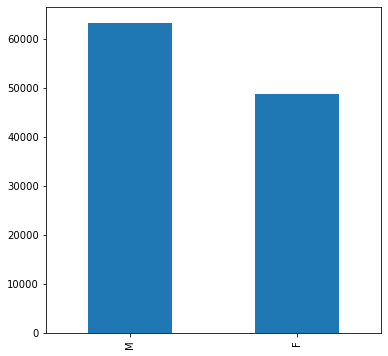

In [3]:
plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

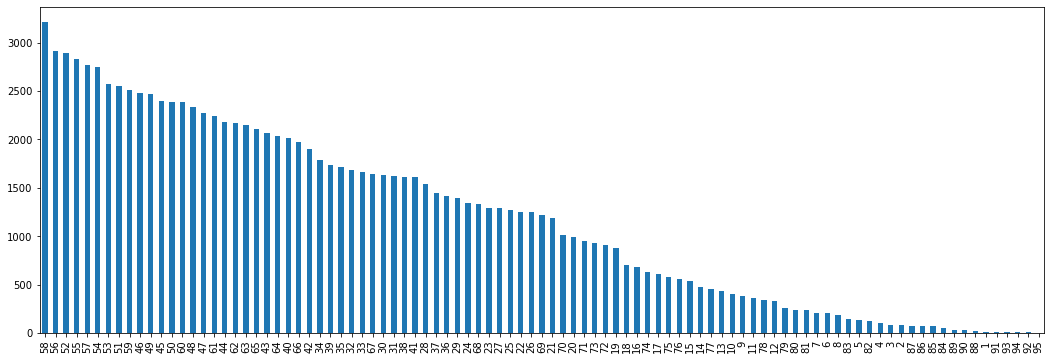

In [4]:
plt.figure(figsize=(18,6))
all_xray_df[all_xray_df['Patient Age'] < 100 ]['Patient Age'].value_counts().plot(kind='bar')

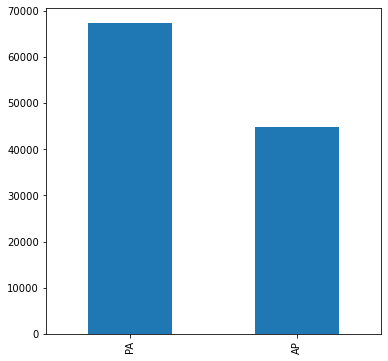

In [5]:
plt.figure(figsize=(6,6))
all_xray_df['View Position'].value_counts().plot(kind='bar')

[Text(0, 0.5, 'Number of Images with Label')]

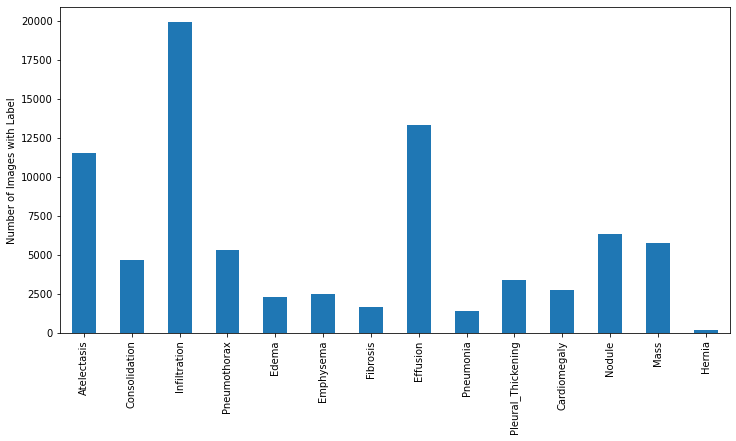

In [6]:
disease_list = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion',
                'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

for disease in disease_list:
    all_xray_df[disease] = [disease in l for l in all_xray_df['Finding Labels'].str.split('|')]

plt.figure(figsize=(12,6))    
ax = all_xray_df[disease_list].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

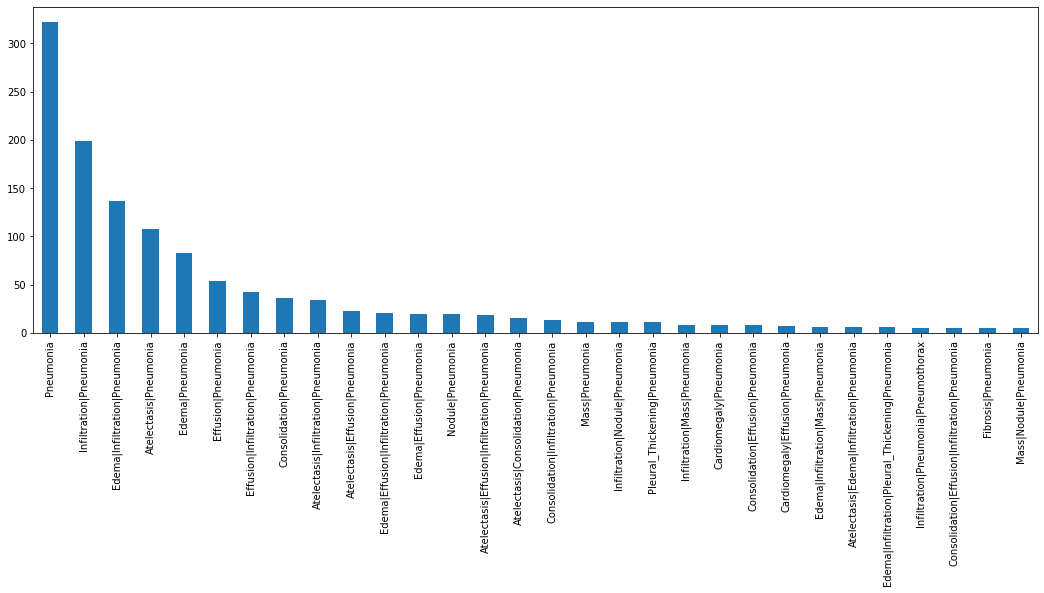

In [7]:
plt.figure(figsize=(18,6))
all_xray_df[all_xray_df.Pneumonia==True]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

(array([1.600e+01, 8.300e+01, 8.400e+01, 1.050e+02, 1.370e+02, 2.030e+02,
        2.060e+02, 1.870e+02, 3.820e+02, 4.000e+02, 3.640e+02, 3.360e+02,
        4.330e+02, 4.760e+02, 5.400e+02, 6.840e+02, 0.000e+00, 6.050e+02,
        7.000e+02, 8.830e+02, 9.880e+02, 1.190e+03, 1.252e+03, 1.296e+03,
        1.342e+03, 1.267e+03, 1.248e+03, 1.290e+03, 1.535e+03, 1.390e+03,
        1.631e+03, 1.619e+03, 1.688e+03, 0.000e+00, 1.661e+03, 1.791e+03,
        1.712e+03, 1.419e+03, 1.444e+03, 1.615e+03, 1.733e+03, 2.020e+03,
        1.609e+03, 1.901e+03, 2.067e+03, 2.184e+03, 2.397e+03, 2.483e+03,
        2.270e+03, 0.000e+00, 2.332e+03, 2.468e+03, 2.390e+03, 2.556e+03,
        2.891e+03, 2.578e+03, 2.749e+03, 2.830e+03, 2.916e+03, 2.771e+03,
        3.209e+03, 2.516e+03, 2.385e+03, 2.238e+03, 2.169e+03, 2.149e+03,
        0.000e+00, 2.037e+03, 2.113e+03, 1.974e+03, 1.648e+03, 1.337e+03,
        1.222e+03, 1.014e+03, 9.540e+02, 9.100e+02, 9.330e+02, 6.310e+02,
        5.840e+02, 5.600e+02, 4.530e+0

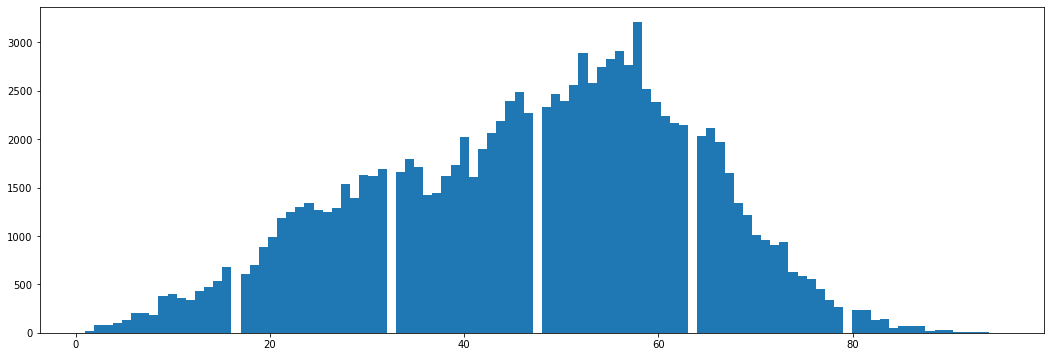

In [8]:
plt.figure(figsize=(18,6))
plt.hist(all_xray_df[all_xray_df['Patient Age'] < 100]['Patient Age'], bins=100)

(array([ 1.,  4.,  2.,  6.,  2.,  8.,  3., 13.,  0.,  2.,  5., 10.,  8.,
         9., 11., 16.,  0.,  8.,  8., 10., 10., 16., 20., 26.,  0., 24.,
        19., 24., 14., 21., 16., 20., 26.,  0., 23., 40., 25., 18., 17.,
        18., 27.,  0., 27., 26., 13., 19., 30., 23., 31.,  0., 23., 18.,
        34., 34., 25., 17., 28., 39.,  0., 25., 29., 34., 28., 36., 29.,
        34.,  0., 24., 22., 30., 19., 30., 34., 22.,  0., 20., 17., 10.,
        12., 11.,  6.,  4.,  5.,  0.,  8.,  6.,  1.,  4.,  3.,  2.,  2.,
         0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 2.  ,  2.88,  3.76,  4.64,  5.52,  6.4 ,  7.28,  8.16,  9.04,
         9.92, 10.8 , 11.68, 12.56, 13.44, 14.32, 15.2 , 16.08, 16.96,
        17.84, 18.72, 19.6 , 20.48, 21.36, 22.24, 23.12, 24.  , 24.88,
        25.76, 26.64, 27.52, 28.4 , 29.28, 30.16, 31.04, 31.92, 32.8 ,
        33.68, 34.56, 35.44, 36.32, 37.2 , 38.08, 38.96, 39.84, 40.72,
        41.6 , 42.48, 43.36, 44.24, 45.12, 46.  , 46.88, 47.76, 48.64,
        

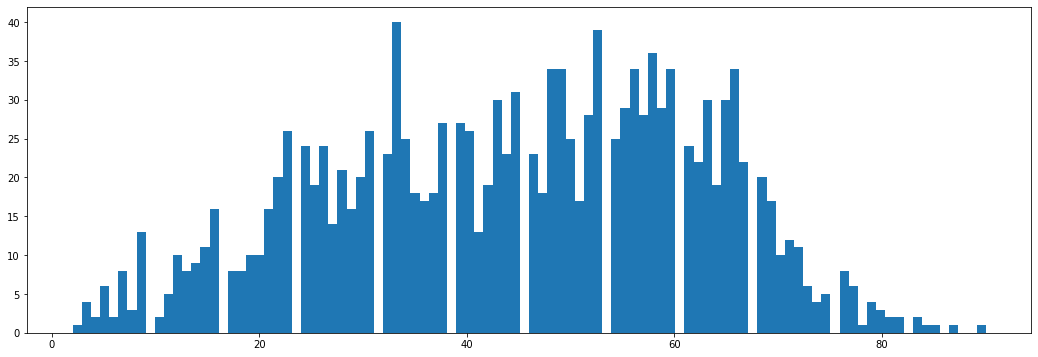

In [9]:
plt.figure(figsize=(18,6))
plt.hist(all_xray_df[(all_xray_df.Pneumonia==True) & (all_xray_df['Patient Age'] < 100)]['Patient Age'], bins=100)

(array([1.600e+01, 8.200e+01, 8.000e+01, 1.030e+02, 1.310e+02, 2.010e+02,
        1.980e+02, 1.840e+02, 3.690e+02, 3.980e+02, 3.590e+02, 3.260e+02,
        4.250e+02, 4.670e+02, 5.290e+02, 6.680e+02, 0.000e+00, 5.970e+02,
        6.920e+02, 8.730e+02, 9.780e+02, 1.174e+03, 1.232e+03, 1.270e+03,
        1.318e+03, 1.248e+03, 1.224e+03, 1.276e+03, 1.514e+03, 1.374e+03,
        1.611e+03, 1.593e+03, 1.665e+03, 0.000e+00, 1.621e+03, 1.766e+03,
        1.694e+03, 1.402e+03, 1.426e+03, 1.588e+03, 1.706e+03, 1.994e+03,
        1.596e+03, 1.882e+03, 2.037e+03, 2.161e+03, 2.366e+03, 2.460e+03,
        2.252e+03, 0.000e+00, 2.298e+03, 2.434e+03, 2.365e+03, 2.539e+03,
        2.863e+03, 2.539e+03, 2.724e+03, 2.801e+03, 2.882e+03, 2.743e+03,
        3.173e+03, 2.487e+03, 2.351e+03, 2.214e+03, 2.147e+03, 2.119e+03,
        0.000e+00, 2.018e+03, 2.083e+03, 1.940e+03, 1.626e+03, 1.317e+03,
        1.205e+03, 1.004e+03, 9.420e+02, 8.990e+02, 9.270e+02, 6.270e+02,
        5.790e+02, 5.520e+02, 4.470e+0

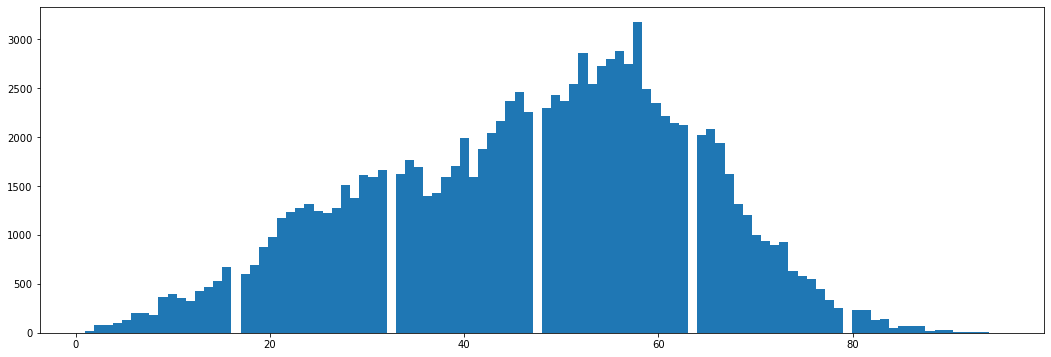

In [10]:
plt.figure(figsize=(18,6))
plt.hist(all_xray_df[(all_xray_df.Pneumonia==False) & (all_xray_df['Patient Age'] < 100)]['Patient Age'], bins=100)

[Text(0, 0.5, 'Number of Images with Label')]

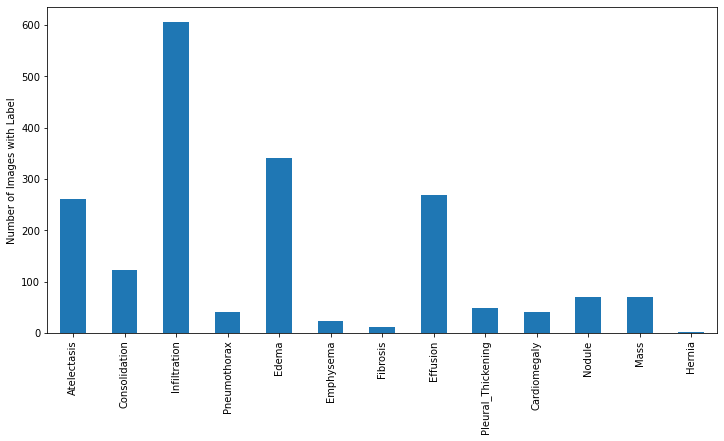

In [11]:
# The distribution of other diseases that are comorbid with pneumonia
disease_list_wo = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion',
                   'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']


plt.figure(figsize=(12,6))    
ax = all_xray_df[all_xray_df.Pneumonia==True][disease_list_wo].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

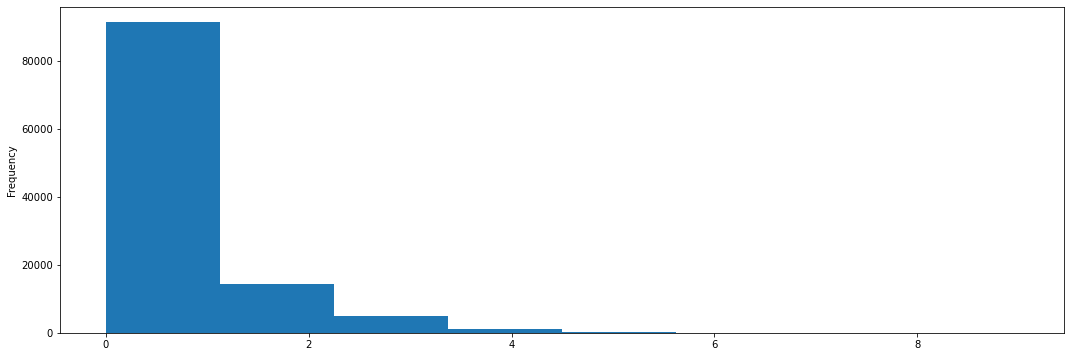

In [12]:
# Number of disease per patient

plt.figure(figsize=(18,6))
all_xray_df['disease count'] = all_xray_df[disease_list].sum(axis=1)
ax = all_xray_df['disease count'].plot(kind='hist', bins=8)

In [13]:
# Pixel-level assessments of the imaging data for healthy & disease states of interest 
# (e.g. histograms of intensity values) and compare distributions across diseases
# use sample_labels.csv for the pixel-level assassements.

# Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

disease_list = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion',
                'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

for disease in disease_list:
    sample_df[disease] = [disease in l for l in sample_df['Finding Labels'].str.split('|')]


all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', sample_df.shape[0])
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)
sample_df.sample(10)

Scans found: 112120 , Total Headers 5606


Image Index        Finding Labels  Follow-up #  Patient ID  \
3620  00017827_000.png            No Finding            0       17827   
3282  00016205_006.png            No Finding            6       16205   
1024  00005372_005.png           Atelectasis            5        5372   
3198  00015732_017.png            No Finding           17       15732   
2206  00011387_000.png            No Finding            0       11387   
4864  00025556_013.png  Atelectasis|Effusion           13       25556   
1397  00007258_000.png            No Finding            0        7258   
1224  00006462_010.png  Atelectasis|Effusion           10        6462   
1637  00008518_001.png           Atelectasis            1        8518   
2216  00011411_000.png            No Finding            0       11411   

     Patient Age Patient Gender View Position  OriginalImageWidth  \
3620        012Y              M            AP                3056   
3282        054Y              F            PA                2992   
1024        047Y              M            AP                2500   
3198        048Y              F            AP                2500   
2206        032Y              F            PA                2586   
4864        014Y              M            PA                2992   
1397        055Y              F            PA                2048   
1224        060Y              F            AP                2500   
1637        029Y              F            AP                2500   
2216        060Y              M            PA                2500   

      OriginalImageHeight  OriginalImagePixelSpacing_x  ...  Emphysema  \
3620                 2544                        0.139  ...      False   
3282                 2991                        0.143  ...      False   
1024                 2048                        0.171  ...      False   
3198                 2048                        0.168  ...      False   
2206                 2513                        0.143  ...      False   
4864                 2661                        0.143  ...      False   
1397                 2500                        0.171  ...      False   
1224                 2048                        0.168  ...      False   
1637                 2048                        0.168  ...      False   
2216                 2048                        0.168  ...      False   

      Fibrosis  Effusion  Pneumonia  Pleural_Thickening  Cardiomegaly  Nodule  \
3620     False     False      False               False         False   False   
3282     False     False      False               False         False   False   
1024     False     False      False               False         False   False   
3198     False     False      False               False         False   False   
2206     False     False      False               False         False   False   
4864     False      True      False               False         False   False   
1397     False     False      False               False         False   False   
1224     False      True      False               False         False   False   
1637     False     False      False               False         False   False   
2216     False     False      False               False         False   False   

       Mass  Hernia                                      path  
3620  False   False  /data/images_008/images/00017827_000.png  
3282  False   False  /data/images_008/images/00016205_006.png  
1024  False   False  /data/images_003/images/00005372_005.png  
3198  False   False  /data/images_007/images/00015732_017.png  
2206  False   False  /data/images_005/images/00011387_000.png  
4864  False   False  /data/images_011/images/00025556_013.png  
1397  False   False  /data/images_004/images/00007258_000.png  
1224  False   False  /data/images_003/images/00006462_010.png  
1637  False   False  /data/images_004/images/00008518_001.png  
2216  False   False  /data/images_005/images/00011411_000.png  

[10 rows x 26 columns]

Emphysema|Infiltration|Pleural_Thickening|Pneumothorax M AP


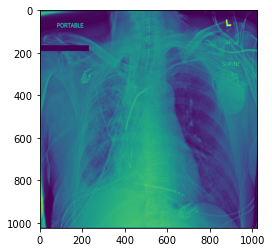

Cardiomegaly|Emphysema M AP


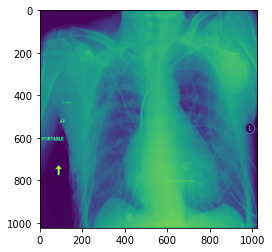

No Finding M AP


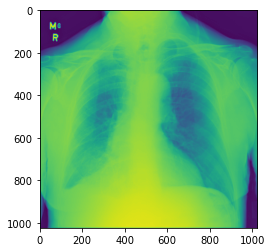

Atelectasis M PA


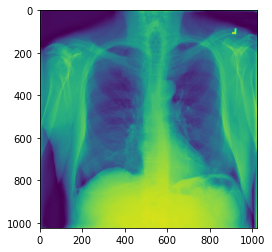

Cardiomegaly|Edema|Effusion F AP


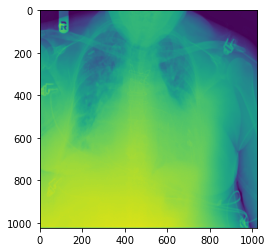

Consolidation|Mass M PA


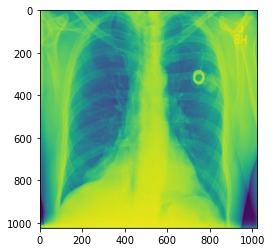

No Finding M AP


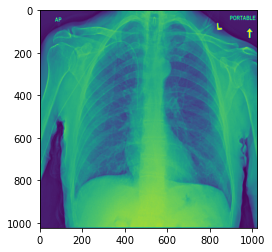

No Finding M AP


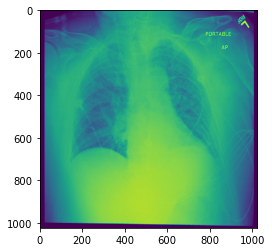

Effusion M PA


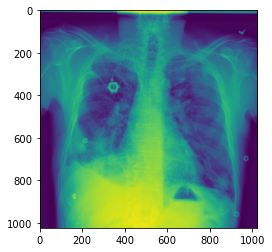

No Finding M AP


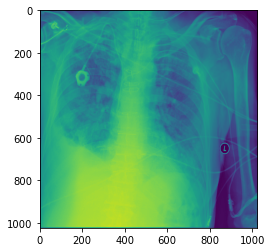

Consolidation|Effusion|Infiltration|Nodule M AP


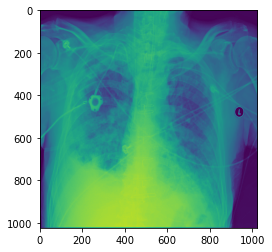

Mass M PA


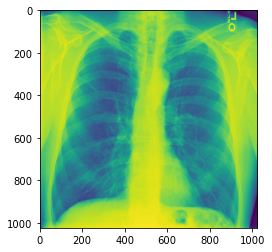

No Finding F PA


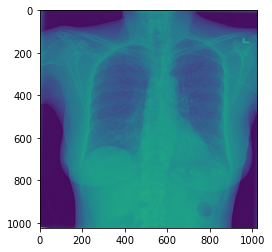

No Finding F PA


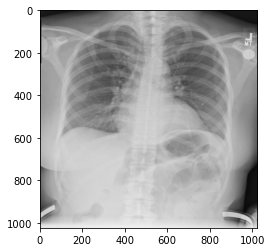

Effusion F PA


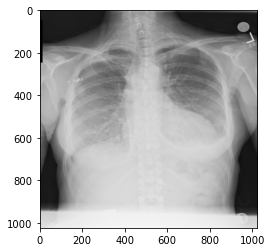

Effusion F PA


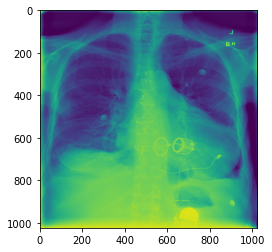

Effusion F PA


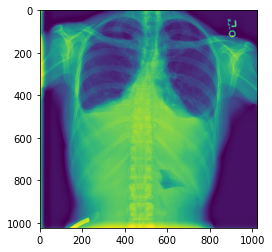

No Finding F AP


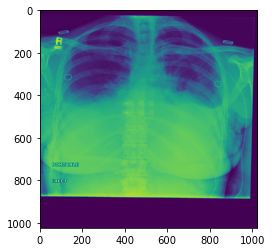

Mass|Pneumothorax M PA


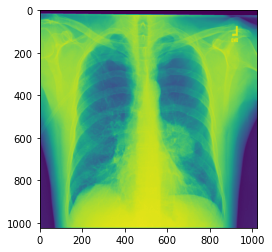

Cardiomegaly|Consolidation F AP


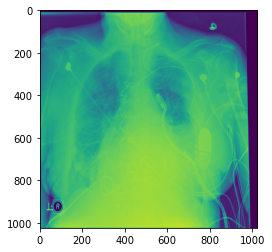

In [14]:
for x in range(20):
    img=mpimg.imread(sample_df.path[x])
    imgplot = plt.imshow(img)
    print(sample_df['Finding Labels'][x], sample_df['Patient Gender'][x], sample_df['View Position'][x])
    plt.show()

Emphysema|Infiltration|Pleural_Thickening|Pneumothorax M AP


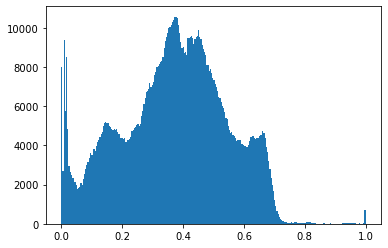

Cardiomegaly|Emphysema M AP


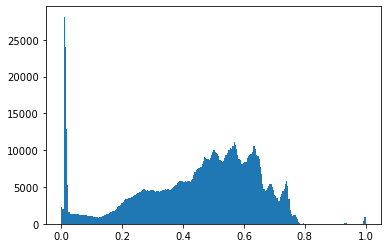

No Finding M AP


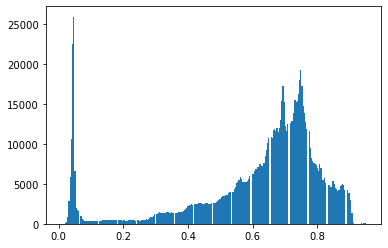

Atelectasis M PA


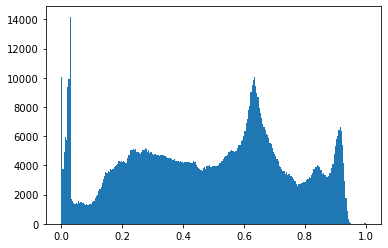

Cardiomegaly|Edema|Effusion F AP


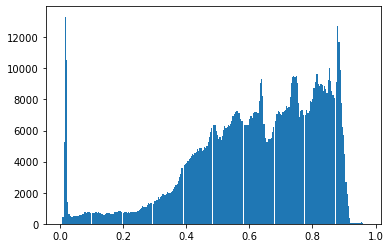

Consolidation|Mass M PA


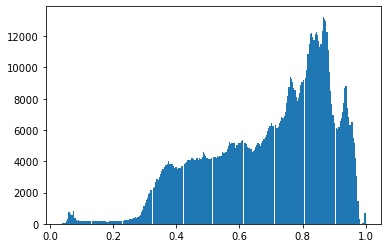

No Finding M AP


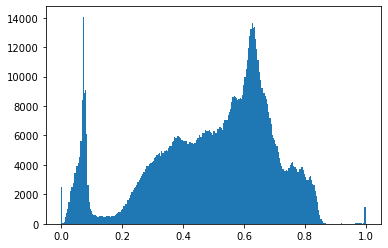

No Finding M AP


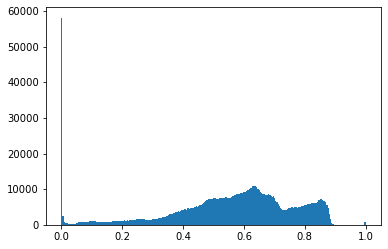

Effusion M PA


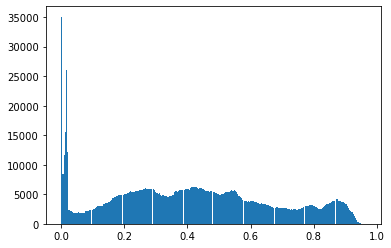

No Finding M AP


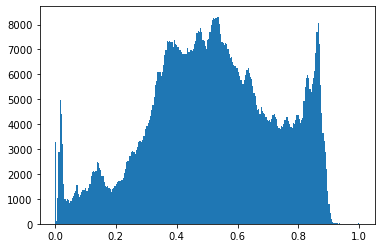

Consolidation|Effusion|Infiltration|Nodule M AP


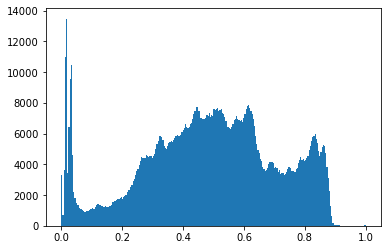

Mass M PA


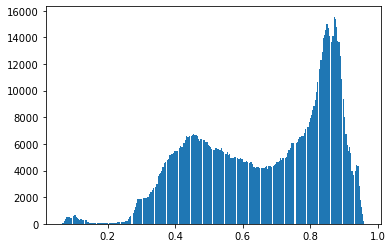

No Finding F PA


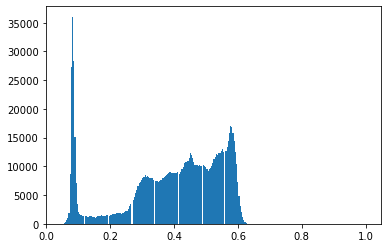

No Finding F PA


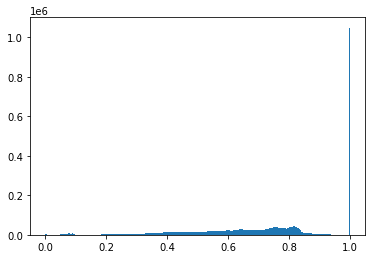

Effusion F PA


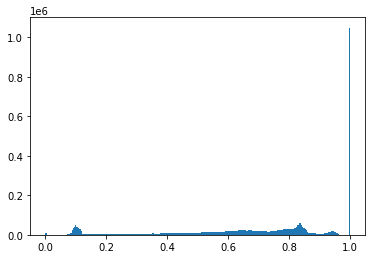

Effusion F PA


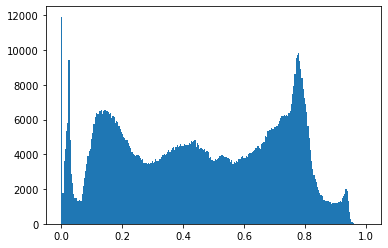

Effusion F PA


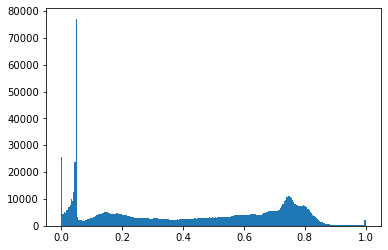

No Finding F AP


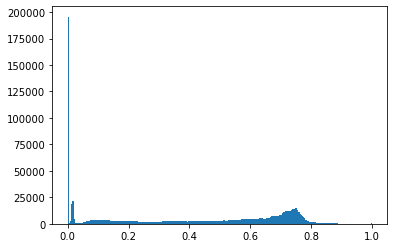

Mass|Pneumothorax M PA


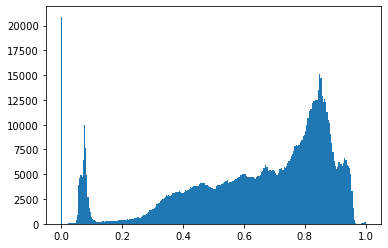

Cardiomegaly|Consolidation F AP


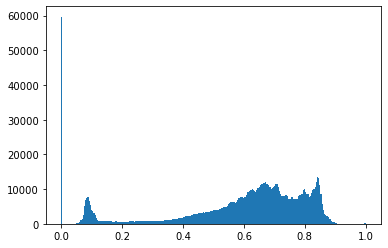

In [15]:
for x in range(20):
    img = mpimg.imread(sample_df.path[x])
    plt.hist(img.ravel(),bins=256)
    print(sample_df['Finding Labels'][x], sample_df['Patient Gender'][x], sample_df['View Position'][x])
    plt.show()

In [16]:
disease_list_wo = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion',
                'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']


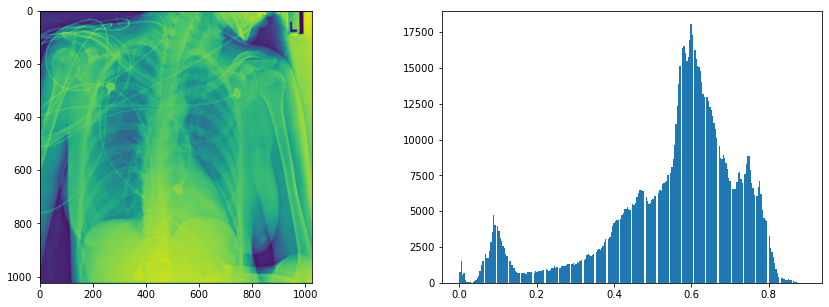

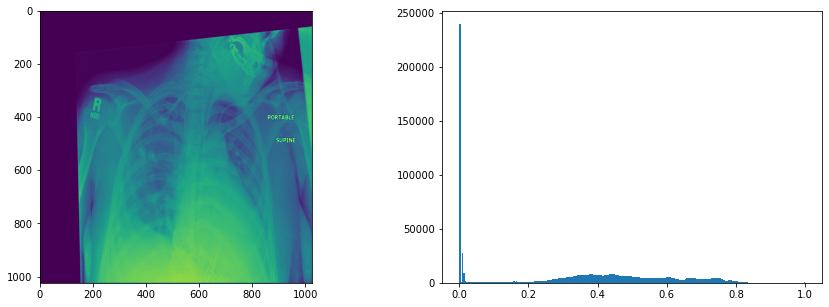

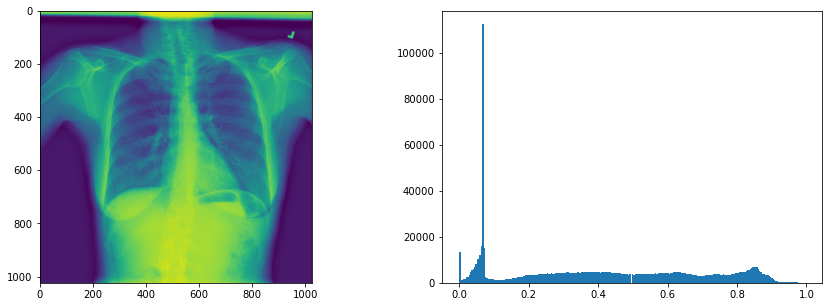

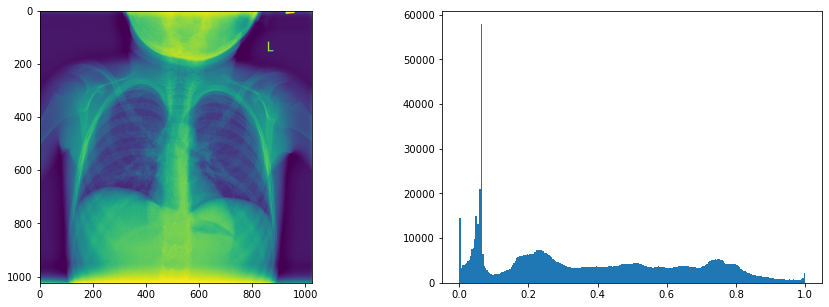

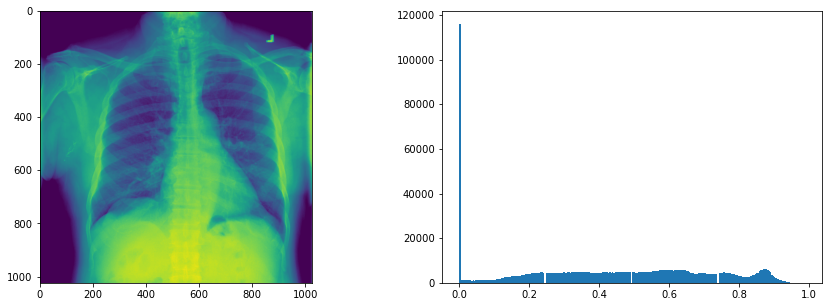

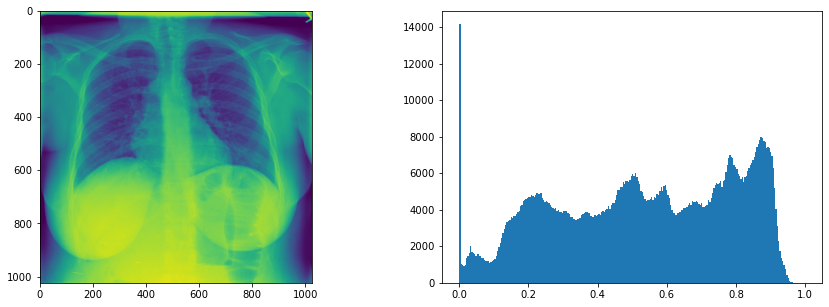

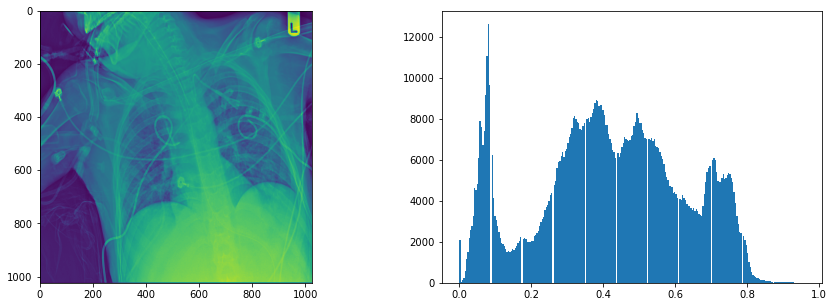

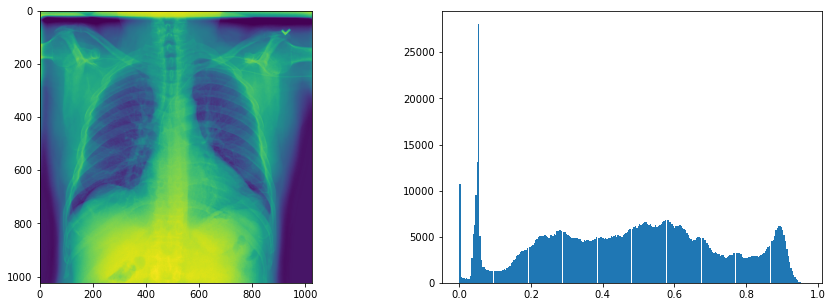

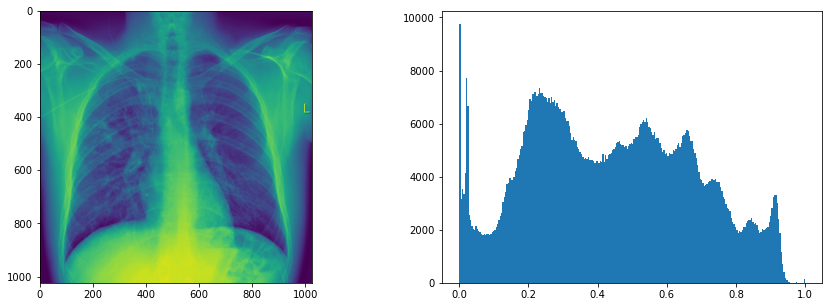

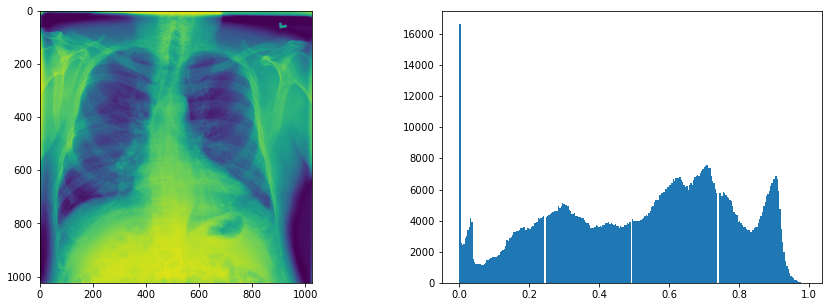

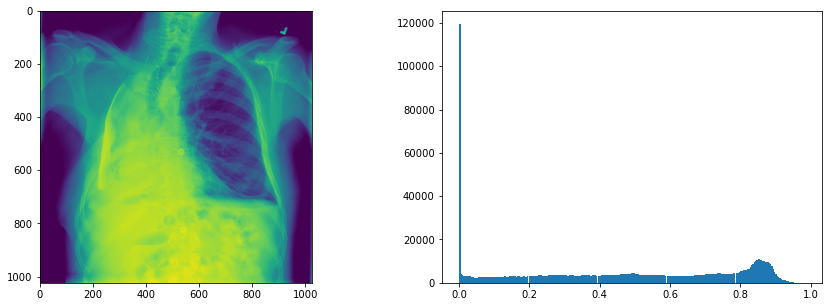

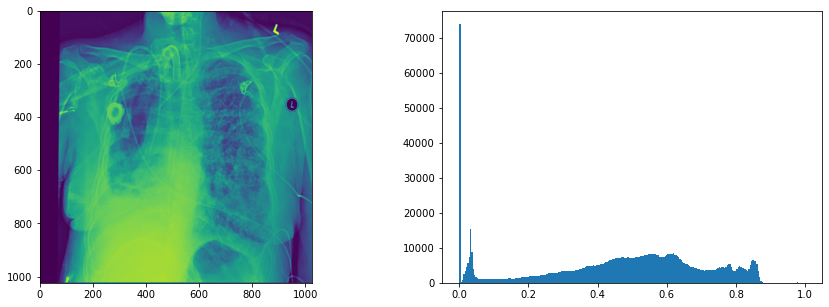

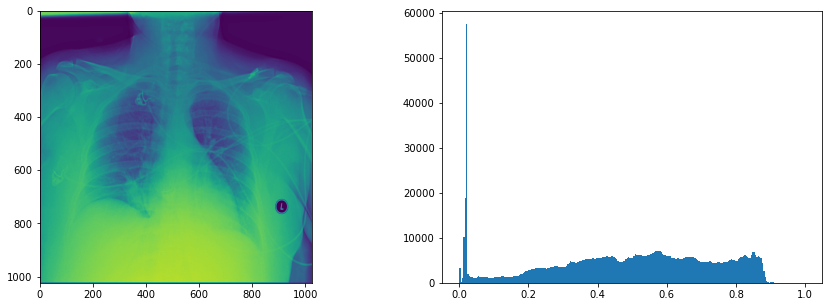

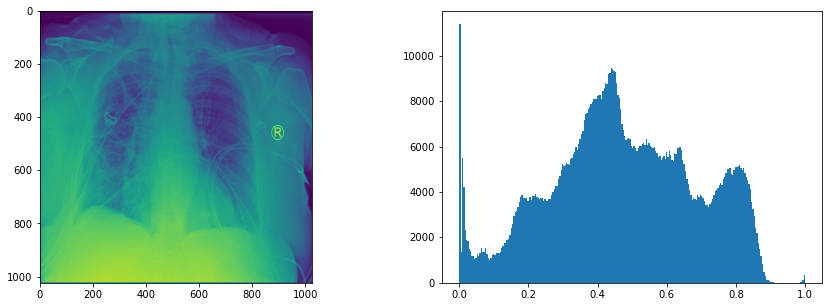

In [17]:
pneumonia_patients = sample_df[(sample_df.Pneumonia == True) & (sample_df[disease_list_wo].sum(axis=1) == 0)]['path']

for patients in pneumonia_patients:
    fig, axis = plt.subplots(1,2,figsize=(15,5))

    
    img = mpimg.imread(patients)    
    axis[0].imshow(img)
    axis[1].hist(img.ravel(),bins=256)
    plt.show()

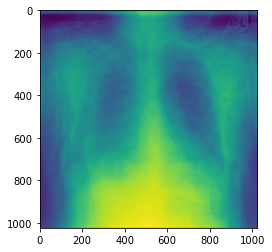

In [18]:
pneumonia_patients = sample_df[(sample_df.Pneumonia == True) & (sample_df[disease_list_wo].sum(axis=1) == 0)]['path']

total_img = None
for patients in pneumonia_patients:
    if total_img is None:
        total_img = mpimg.imread(patients)
    else:
        total_img += mpimg.imread(patients)
        
total_img /= len(pneumonia_patients)
imgplot = plt.imshow(total_img)
plt.show()

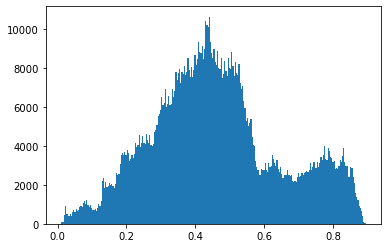

In [19]:
plt.hist(total_img.ravel(),bins=256)
plt.show()

In [20]:
sample_df[sample_df[disease_list].sum(axis=1) == 0]

Image Index Finding Labels  Follow-up #  Patient ID Patient Age  \
2     00000017_001.png     No Finding            1          17        077Y   
6     00000042_002.png     No Finding            2          42        071Y   
7     00000057_001.png     No Finding            1          57        071Y   
9     00000061_019.png     No Finding           19          61        077Y   
12    00000080_005.png     No Finding            5          80        067Y   
...                ...            ...          ...         ...         ...   
5597  00030639_001.png     No Finding            1       30639        061Y   
5600  00030704_000.png     No Finding            0       30704        052Y   
5601  00030712_000.png     No Finding            0       30712        058Y   
5604  00030792_000.png     No Finding            0       30792        010Y   
5605  00030797_000.png     No Finding            0       30797        024Y   

     Patient Gender View Position  OriginalImageWidth  OriginalImageHeight  \
2                 M            AP                2500                 2048   
6                 M            AP                3056                 2544   
7                 M            AP                3056                 2544   
9                 M            AP                3056                 2544   
12                F            PA                1884                 2021   
...             ...           ...                 ...                  ...   
5597              M            AP                3056                 2544   
5600              F            PA                2021                 2021   
5601              M            PA                2021                 2021   
5604              F            PA                1775                 1712   
5605              M            PA                2021                 2021   

      OriginalImagePixelSpacing_x  ...  Emphysema  Fibrosis  Effusion  \
2                        0.168000  ...      False     False     False   
6                        0.139000  ...      False     False     False   
7                        0.139000  ...      False     False     False   
9                        0.139000  ...      False     False     False   
12                       0.194311  ...      False     False     False   
...                           ...  ...        ...       ...       ...   
5597                     0.139000  ...      False     False     False   
5600                     0.194311  ...      False     False     False   
5601                     0.194311  ...      False     False     False   
5604                     0.194311  ...      False     False     False   
5605                     0.194311  ...      False     False     False   

      Pneumonia  Pleural_Thickening  Cardiomegaly  Nodule   Mass  Hernia  \
2         False               False         False   False  False   False   
6         False               False         False   False  False   False   
7         False               False         False   False  False   False   
9         False               False         False   False  False   False   
12        False               False         False   False  False   False   
...         ...                 ...           ...     ...    ...     ...   
5597      False               False         False   False  False   False   
5600      False               False         False   False  False   False   
5601      False               False         False   False  False   False   
5604      False               False         False   False  False   False   
5605      False               False         False   False  False   False   

                                          path  
2     /data/images_001/images/00000017_001.png  
6     /data/images_001/images/00000042_002.png  
7     /data/images_001/images/00000057_001.png  
9     /data/images_001/images/00000061_019.png  
12    /data/images_001/images/00000080_005.png  
...                                        ...  
5597

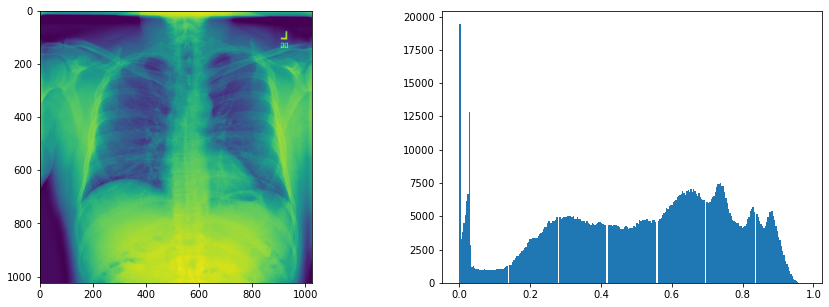

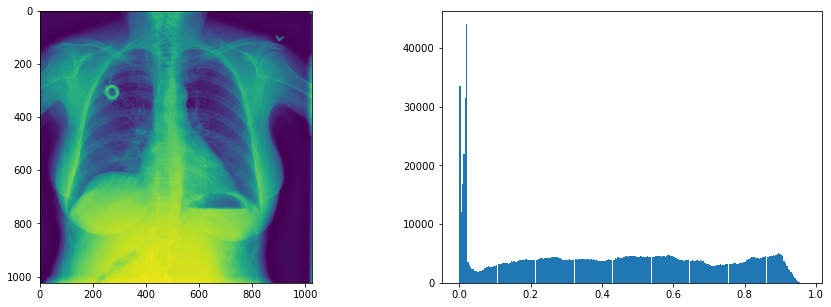

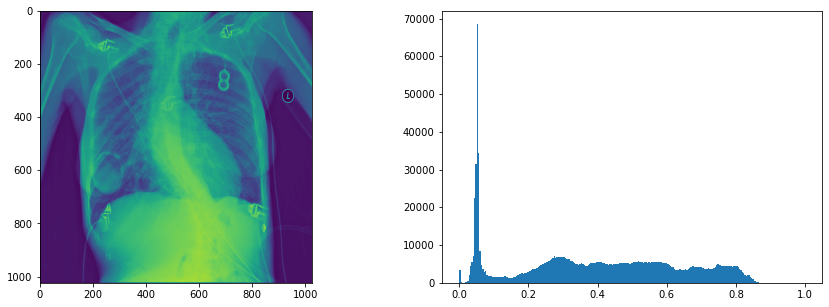

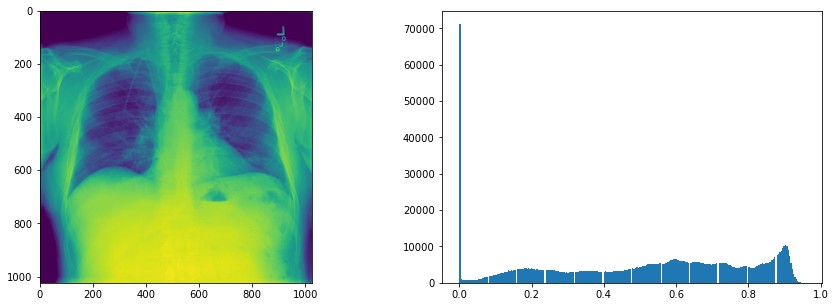

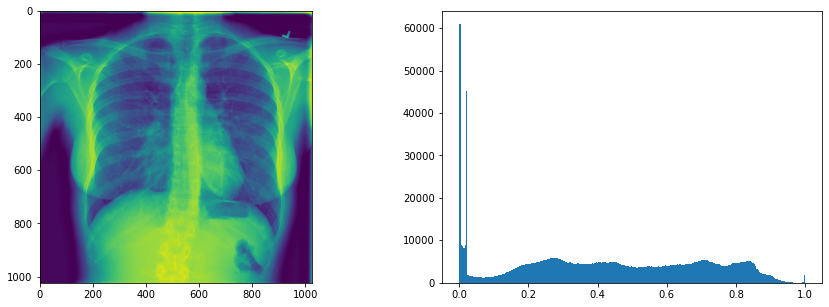

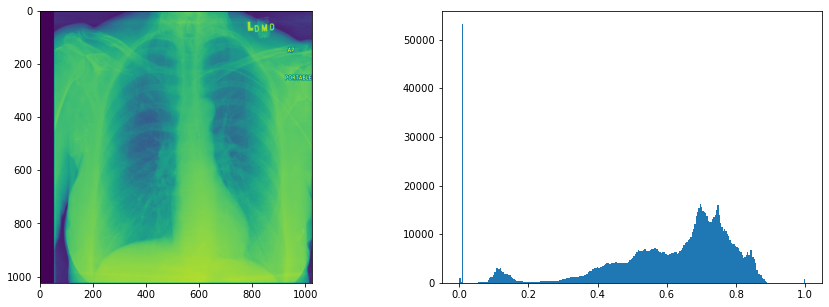

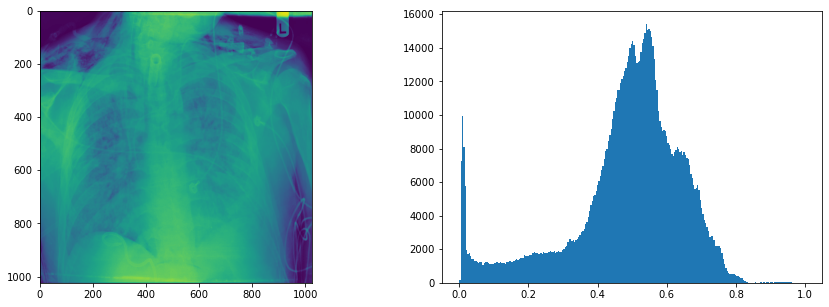

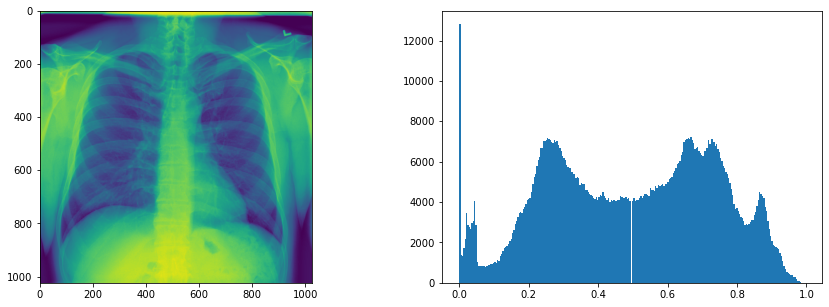

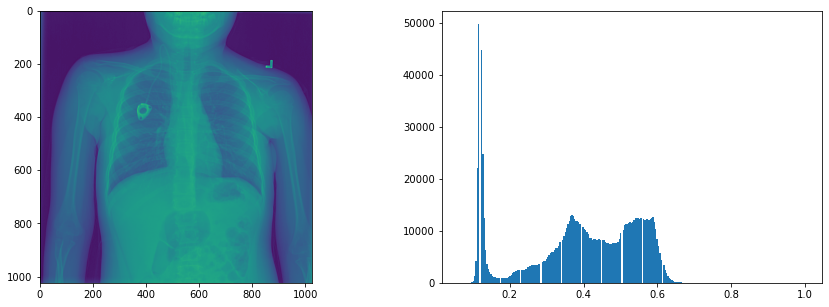

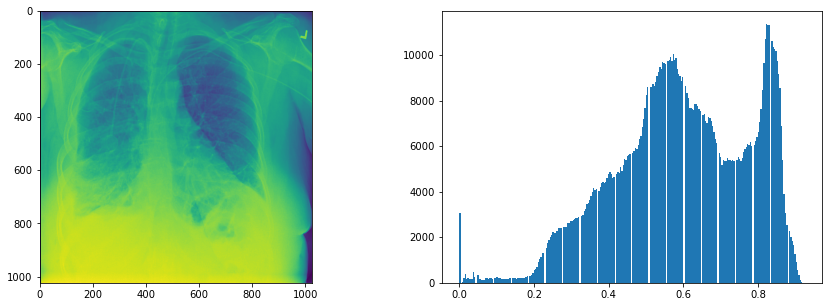

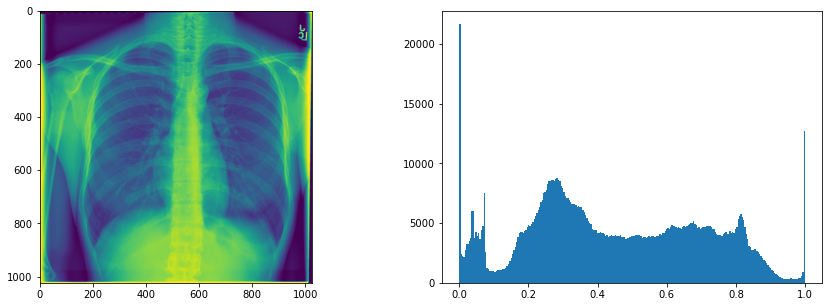

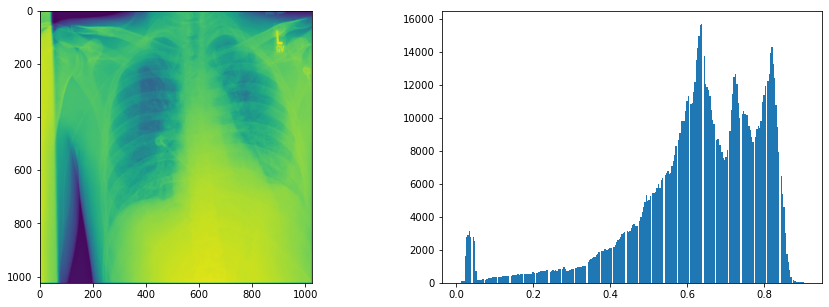

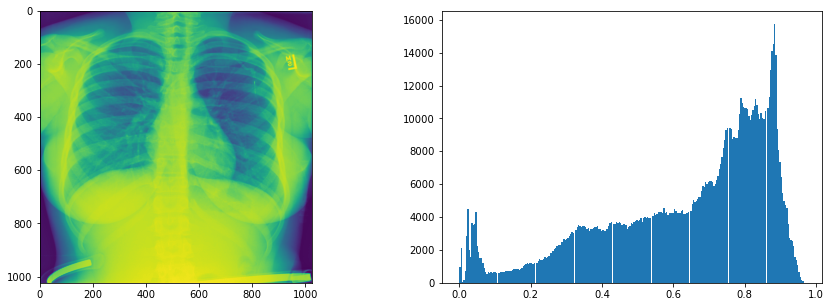

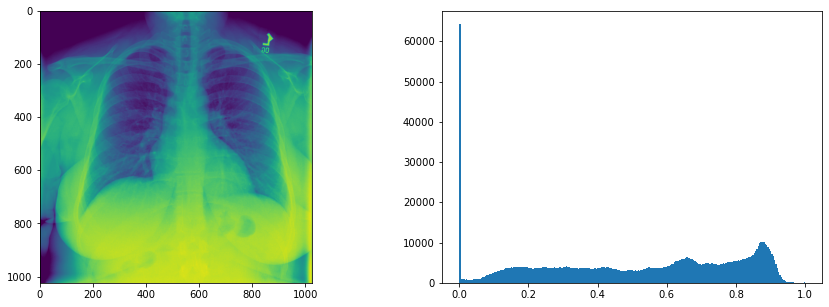

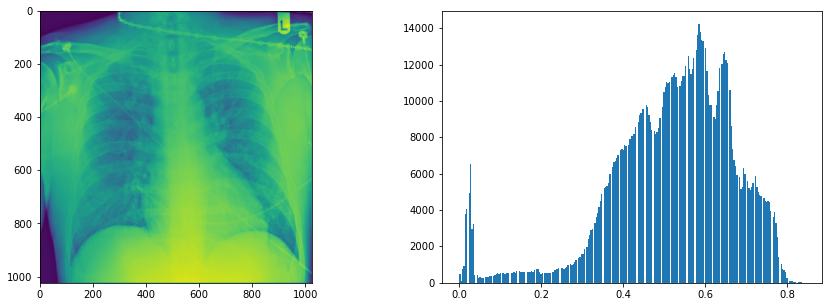

In [23]:
no_disease_patients = sample_df[sample_df[disease_list].sum(axis=1) == 0].sample(15)['path']

for patients in no_disease_patients:
    fig, axis = plt.subplots(1,2,figsize=(15,5))

    
    img = mpimg.imread(patients)    
    axis[0].imshow(img)
    axis[1].hist(img.ravel(),bins=256)
    plt.show()

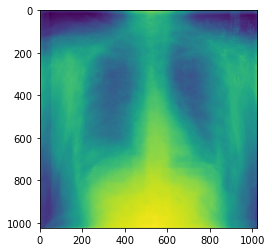

In [27]:
total_img = None
for patients in no_disease_patients:
    if total_img is None:
        total_img = mpimg.imread(patients)
    else:
        total_img += mpimg.imread(patients)
        
total_img /= len(no_disease_patients)
imgplot = plt.imshow(total_img)
plt.show()

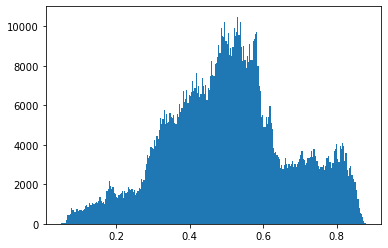

In [28]:
plt.hist(total_img.ravel(),bins=256)
plt.show()